In [1]:
# In Python it is standard practice to import the modules we need at the very top of our scripts
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Reading data files and computing statistics


An important aspect of data handling is to evaluate statistical functions, including the mean, standard deviation and standard error. 
Use the NumPy documentation to find functions to calculate the mean and standard deviation.

Remember (see Mathematical Techniques) that for a distribution representing a *sample* from a population (e.g. if you measured the heights of 20 students from a class of 200), the definition of the standard deviation is 
\begin{equation}
 \sigma_{N-1}=\frac{\sqrt{\sum_i (x_i-\bar{x})^2}}{\sqrt{N-1}}.
\end{equation}
whilst the standard deviation for the full *population* distribution (e.g. if you measured the heights of *every* student) is
\begin{equation}
  \sigma_N = \frac{\sqrt{\sum_i (x_i-\bar{x})^2}}{\sqrt{N}}.
\end{equation}
Fitting $N$ data points to the population distribution with a known value for the mean gives us $N$ degrees of freedom.
Evaluating the mean from the sample reduces the degrees of freedom to $N-1$.

Which of these two does NumPy use by default?
Can you pass an additional (optional) parameter to the function to control how it behaves?

The formula for the standard error is
\begin{equation}
 \alpha=\frac{\sigma_{N-1}}{\sqrt{N}},
\end{equation}
where $N$ is the number of data points.
Use the SciPy documentation to find a function to calculate the standard error.
Do you need to bear in mind the difference between sample distributions and population distributions?

In the Markdown cell below, add some comments to yourself on how to use these three functions and how to ensure you get the sample and not population statistics.

**Write your notes here**



# Exercise : Calculating Statistical Metrics

In this exercise you will practice importing tables of experimental data into Python, and analyzing them.
There is a data file `poisson-data.csv` available in your Jupyter Hub folder. Your first task is to import it into your notebook. The file is a 'comma separated values' files - this means it contains an array of data where rows are discriminated by new lines and columns by, usually, commas. CSV files can be generated and read by spreadsheet programs, and are often generated by data acquisition programs used to control lab experiments.

There are several approaches and functions you could use to read and write `.csv` files, for this course we're going to use `np.loadtxt()` and `np.savetxt()`.
Read the documentation for `np.loadtxt()`.

Take a look at the documentation for `np.loadtxt()`. Can you see which parameters will you need to set to read a file where values are separated by commas? The documentation often lists many *optional* parameters that you are unlikely to need to use - you may find it helpful to do an internet search like 'load csv using np.loadtxt' to find some examples. By cross-referencing simple examples with the documentation, you should be able to figure out what to do.

*Hint: if a parameter is listed as being of type 'str', you need to provide a string, not a number. You have already been using strings with the `print()` function: a string is just some text surrounded by single quotes, e.g. `'myfilename.txt'`.*
<br><br>

Load `poisson-data.csv` into your notebook and assign it to a variable.

In [2]:
poisson = np.loadtxt("poisson-data.csv", dtype = "int", delimiter=",")

Now let's take a quick look at your data, to see what you have just loaded in. You could open the .csv file, but it is often convenient to take a quick look here in the notebook:

In [10]:
import numpy as np
poisson = np.loadtxt("poisson-data.csv", dtype = "float", delimiter=",")
print('The array with Poisson data has shape:', poisson.shape)
print('The data looks like:')
print(poisson)

The array with Poisson data has shape: (1000, 2)
The data looks like:
[[ 4. 11.]
 [ 5.  9.]
 [ 6.  5.]
 ...
 [ 8.  7.]
 [ 2. 10.]
 [ 4.  5.]]


## Poisson Distribution

The file contains two datasets, each following a Poisson distribution.

1) Plot the histogram using the `plt.hist()` function for each of the two Poisson distributions (*hint: use array slicing to pick out just one of the distributions at a time*). Plot both histograms as a separate subplot in one figure. Consult the Matplotlib documentation and examples on `plt.hist()`. Think about the number of bins in your histograms: try a few values out, and choose a number that neither oversamples the data (leading to scattered histograms) nor undersamples it (losing detail).

2) For both data sets determine the mean, standard deviation and standard error, calculate also the square root of the mean.  Display your results using the `print` statement; be sure to format your results neatly. What do you notice about the value of the square root of the mean (comment in the Markdown cell)?

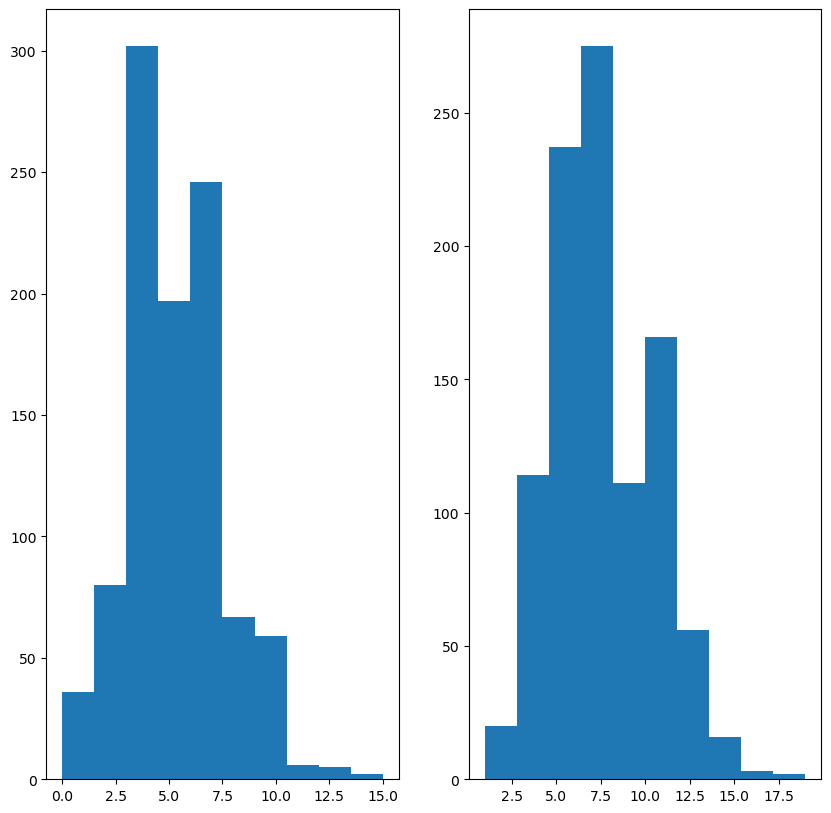

In [67]:
import numpy as np
import matplotlib.pyplot as plt 
poisson = np.loadtxt("poisson-data.csv", dtype = "float", delimiter=",")

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1) 
plt.hist(poisson[:, 0])

plt.subplot(1, 2, 2) 
plt.hist(poisson[:, 1])

plt.show()


In [6]:
import numpy as np
poisson = np.loadtxt("poisson-data.csv", dtype = "float", delimiter=",")

sd_1 = np.std(poisson[:, 0])
mean_1 = np.mean(poisson[:, 0])
error_1 = sd_1/np.sqrt(1000)
sqrt_mean_1 = np.sqrt(np.mean(poisson[:, 0]))

sd_2 = np.std(poisson[:, 1])
mean_2 = np.mean(poisson[:, 1])
error_2 = sd_2/np.sqrt(1000)
sqrt_mean_2 = np.sqrt(np.mean(poisson[:, 1]))

print("Standard deviation of the first data set is {0:.2f}, the square mean is {1:0.2f}, the mean is {2:0.2f} and error is {3:0.2f}.".format(sd_1,sqrt_mean_1,mean_1,error_1))
print("Standard deviation of the second data set is {0:.2f}, the square mean is {1:0.2f}, the mean is {2:0.2f} and error is {3:0.2f}.".format(sd_2,sqrt_mean_2,mean_2,error_2))


Standard deviation of the first data set is 2.23, the square mean is 2.25, the mean is 5.07 and error is 0.07.
Standard deviation of the second data set is 2.76, the square mean is 2.75, the mean is 7.57 and error is 0.09.


**What do you notice about sqrt(mean) and the standard deviation? Write your answer here**



In [ ]:
The standard deviation of the two sets is closer together while the mean is further apart